## Проект по визуализации данных 

Этапы работ по машинному обучению включают в себя:
    
1) сбор и хранение данных 

2) очистка и организация данных 

3) исследование данных (отчет, визуализация, коммуникация) 

это все позволяет ответить нам на поставленные вопросы 

### Цель:

ответить на вопрос - есть ли конфликт интересов на веб-сайте, ктр продает билеты на фильмы онлайн, а также отображает рейтинги фильмов? 

ИЛИ более конкретно - могут ли такие сайты как Fandango отображать завышенные рейтинги, чтобы продавать больше билетов? 

### Инструменты 

Jupiter + NumPy + Pandas + Matplotlib + Seaborn 

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [176]:
fandango = pd.read_csv('fandango_scrape.csv')

fandango.head(10)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055


In [177]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [178]:
len(fandango)

504

### Задание 1
Давайте изучим связь между популярностью фильма и его рейтингом. 
Нарисуйте график scatterplot, показывающий связь между колонками RATING и VOTES.

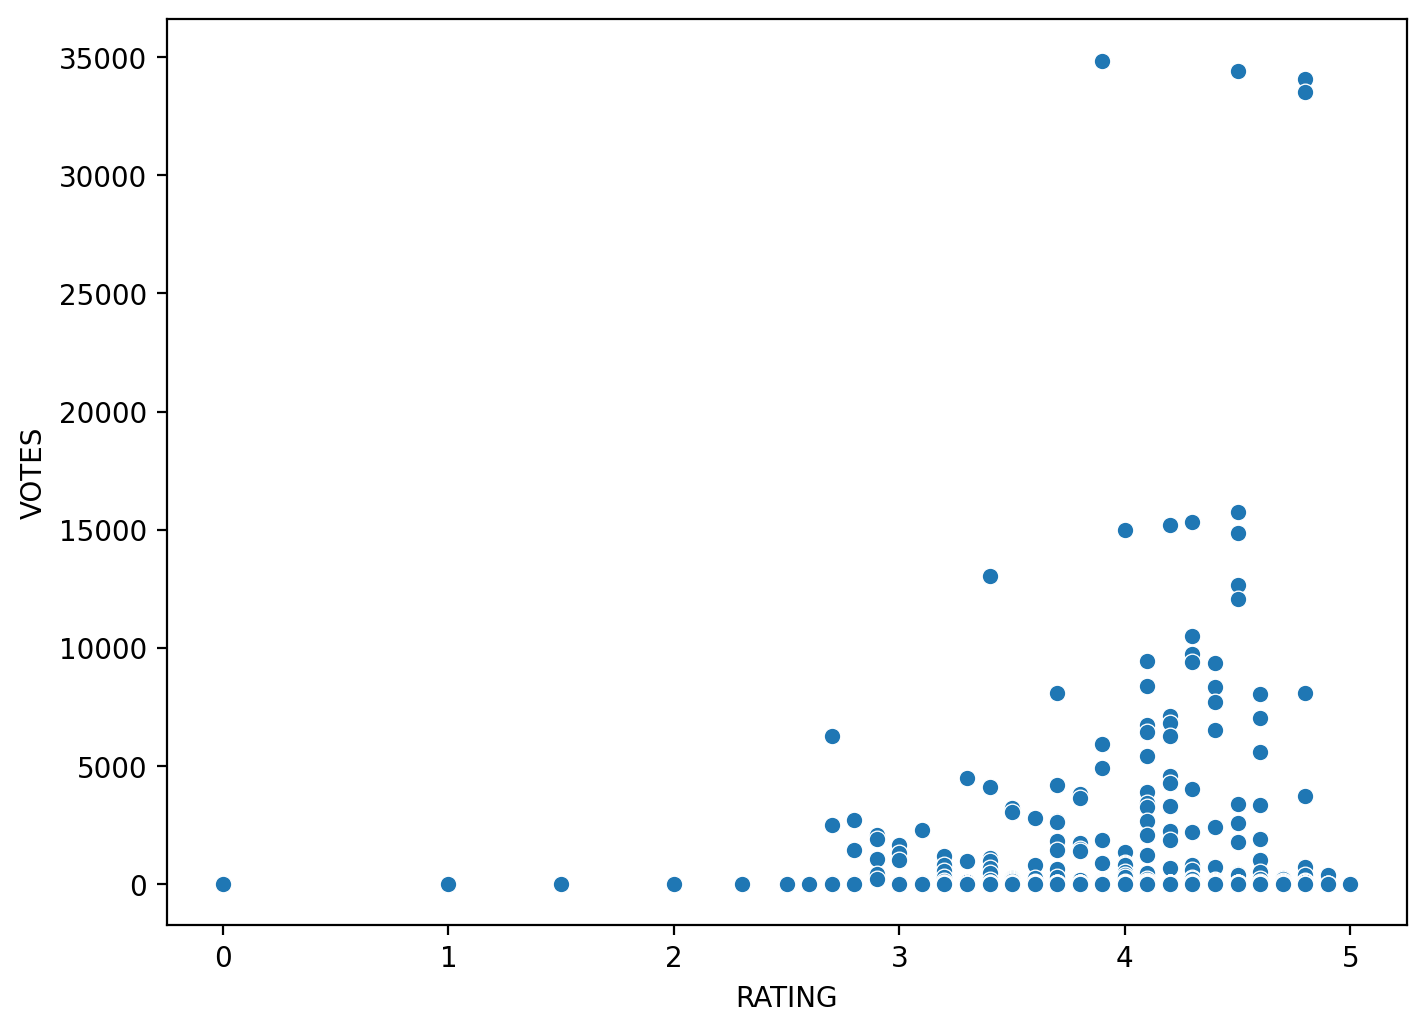

In [179]:
plt.figure(figsize = (8, 6), dpi = 200)
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES')

plt.show()

### Задание 2 
Вычислить корреляцию между колонками

In [180]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Видим, что рейтинг и кол-во звезд взаимосвязаны (зависят друг от друга)

### Задание 3
Сделаем предположение, что каждая строка в колонке FILM содержит значение в следующем формате:

Название Фильма (Год)

Создайте новую колонку, в ней возьмите из строки FILM только год, и назовите эту новую колонку YEAR

In [181]:
# функция для отделения года от строки 
def year(film):
    sp = film.split()
    return sp[-1][1:-1]
    
fandango['YEAR'] = fandango['FILM'].apply(year)

fandango.head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [182]:
s = '[201356)'
s[1:-1]

'201356'

### Задание 4

Сколько фильмов содержится в наборе данных Fandango, в разбивке по годам?

Визуализируйте полученные данные через гистограмму 

In [183]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Видим, что подавляющее большинство фильмов из 2015 года 

<AxesSubplot:xlabel='YEAR', ylabel='count'>

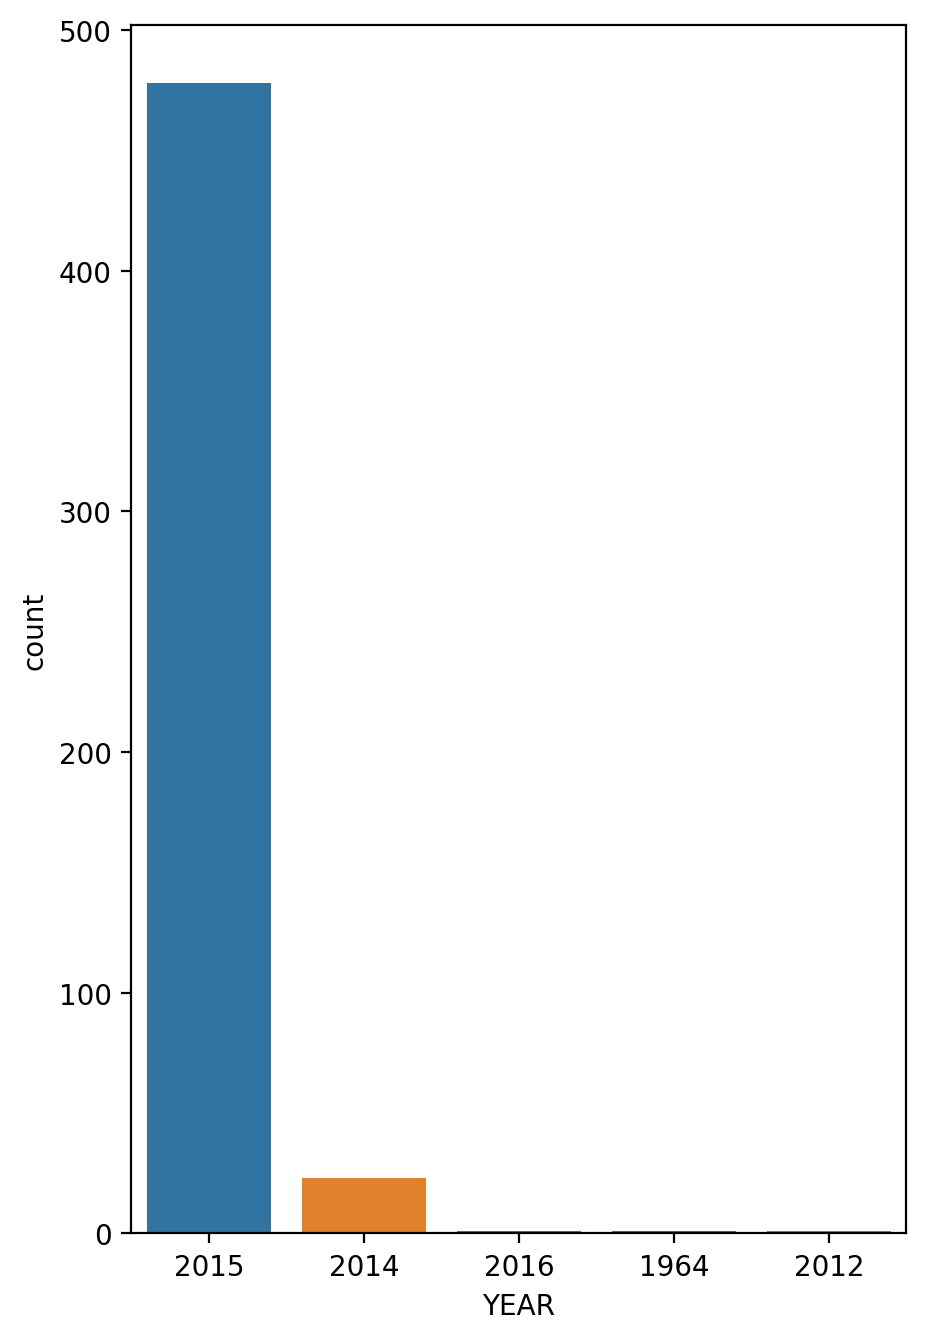

In [187]:
plt.figure(figsize = (5, 8), dpi = 200)
sns.countplot(data = fandango, x = 'YEAR')

### Задание 5

Какие 10 фильмов получили наибольшее количество голосов (votes)?

In [33]:
fandango.sort_values('VOTES', ascending = False)[:10]

# либо через fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Задание 6

Сколько фильмов имеет нулевое количество голосов (votes)?

In [35]:
len(fandango[fandango['VOTES'] == 0])

69

### Задание 7 

Создайте DataFrame только с теми фильмами, которые имеют голоса (votes) - то есть, удалите те фильмы, у которых нет ни одного голоса.

In [39]:
fandango_new = fandango[fandango['VOTES'] > 0]

fandango_new.head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Задание 7 

Создайте график KDE plot (или несколько таких графиков), который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING). Обрежьте диапазон KDE в пределах 0-5.

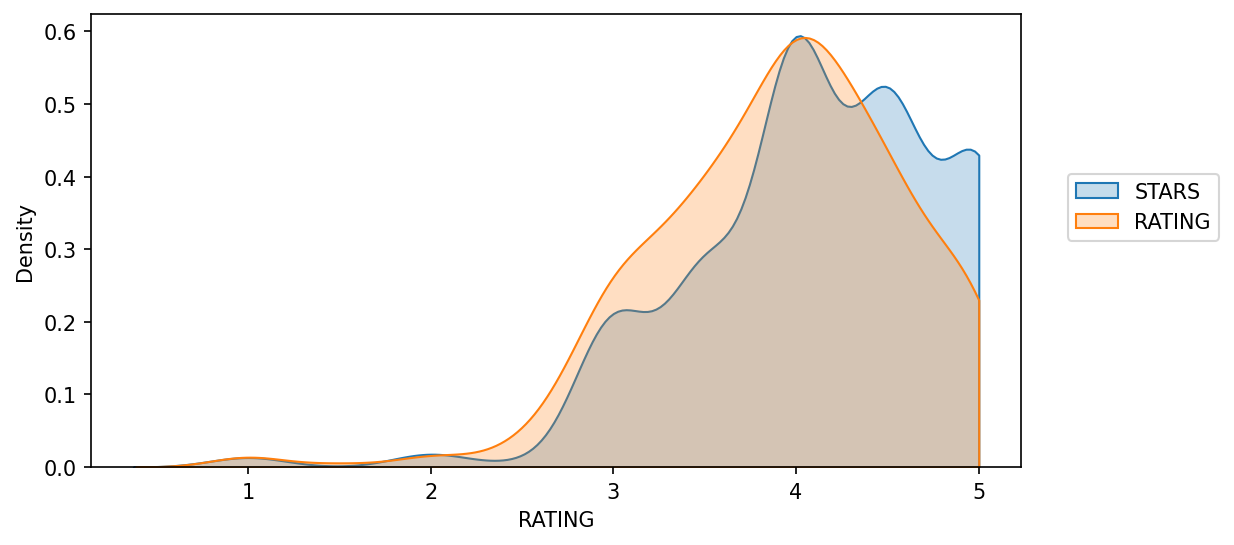

In [48]:
# делаем 2 kde-графика 

plt.figure(figsize = (8, 4), dpi = 150)
sns.kdeplot(data = fandango_new, x = 'STARS', clip = [0,5], fill = True,
           label = 'STARS')
sns.kdeplot(data = fandango_new, x = 'RATING', clip = [0,5], fill = True,
           label = 'RATING')

plt.xlabel('RATING')
plt.legend(loc = (1.05, 0.5))

### Задание 8 

Теперь давайте посчитаем эту разницу в численном виде; Создайте новую колонку, в которой сохраните разницу между колонками STARS и RATING с помощью обычного вычитания STARS-RATING, а также выполните округление до одной десятичной цифры после запятой.

In [54]:
fandango_new['STARS-DIFF'] = np.round(fandango_new['STARS'] - fandango_new['RATING'], 1)

fandango_new

C:\Users\User\AppData\Local\Temp/ipykernel_21888/3637639281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_new['STARS-DIFF'] = np.round(fandango_new['STARS'] - fandango_new['RATING'], 1)


,FILM,STARS,RATING,VOTES,YEAR,STARS-DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [188]:
fandango.head()

# исходный Df НЕ поменялся 

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


### Задание 9 

Нарисуйте график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING

<AxesSubplot:xlabel='STARS-DIFF', ylabel='count'>

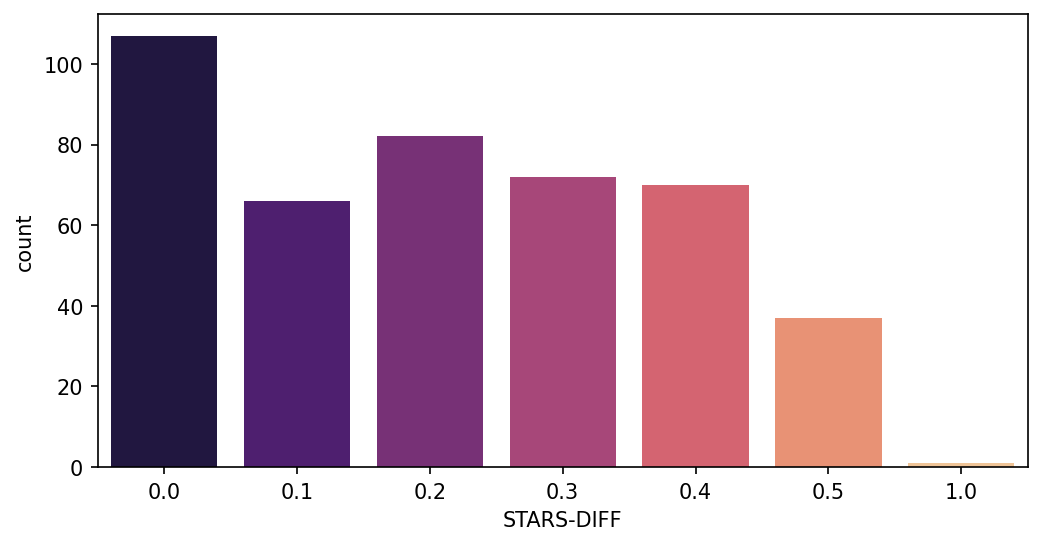

In [189]:
plt.figure(figsize = (8, 4), dpi = 150)
sns.countplot(data = fandango_new, x = 'STARS-DIFF', palette='magma')

### Задание 10 

На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом! Найдите этот фильм.

In [59]:
fandango_new[fandango_new['STARS-DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS-DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Теперь переходим к сравнению рейтингов Fandango с рейтингами других компаний 

In [133]:
# загружаем новый df

all_sites = pd.read_csv('all_sites_scores.csv')

all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [134]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [135]:
# описательная статистика по колонкам 

all_sites.describe()

# это очень ПОЛЕЗНЫЙ метод! 

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги.

### Задание 11
Нарисуйте график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.

(0.0, 100.0)

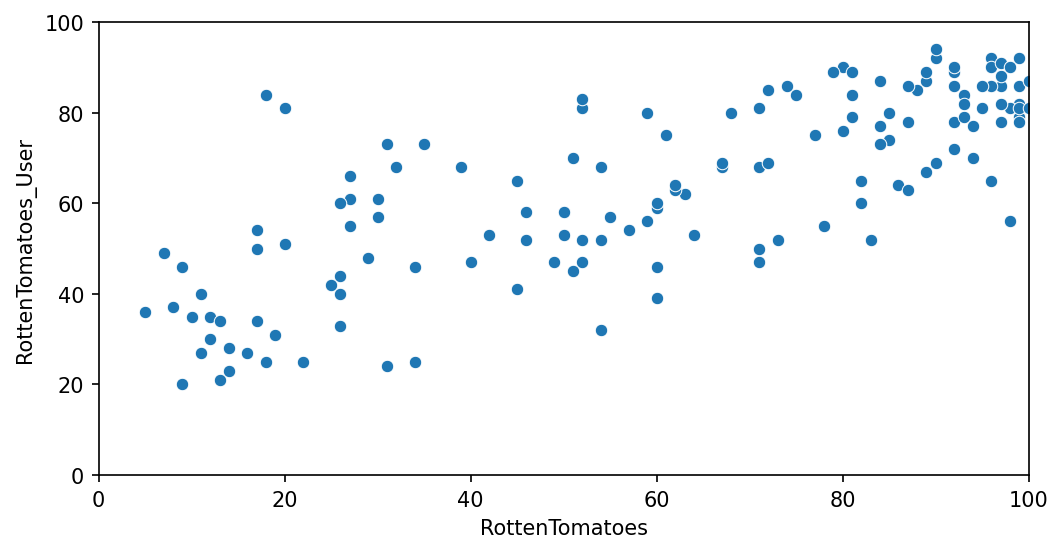

In [190]:
plt.figure(figsize = (8, 4), dpi = 150)
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', 
               y = 'RottenTomatoes_User')

# пишем пределы по осям для большей наглядности 
plt.xlim(0, 100)
plt.ylim(0, 100)

Видим, что это похоже на линейную зависимость 

Давайте изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

### Задание 12
Создайте новую колонку, в которой сохраните разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes. Используйте формулу RottenTomatoes-RottenTomatoes_User.

In [137]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

### Задание 12

Вычислите среднюю абсолютную разницу между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes, согласно описанию выше.

In [138]:
def func(x):
    if x < 0:
        return x * (-1)
    return x

np.mean(all_sites['Rotten_Diff'].apply(func))

# all_sites['Rotten_Diff'].apply(abs).mean() - 2 способ 

15.095890410958905

### Задание 13

Нарисуйте график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes. На этом графике будут отрицательные значения. Для отображения этого распределения можете использовать как KDE, так и гистограммы.

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

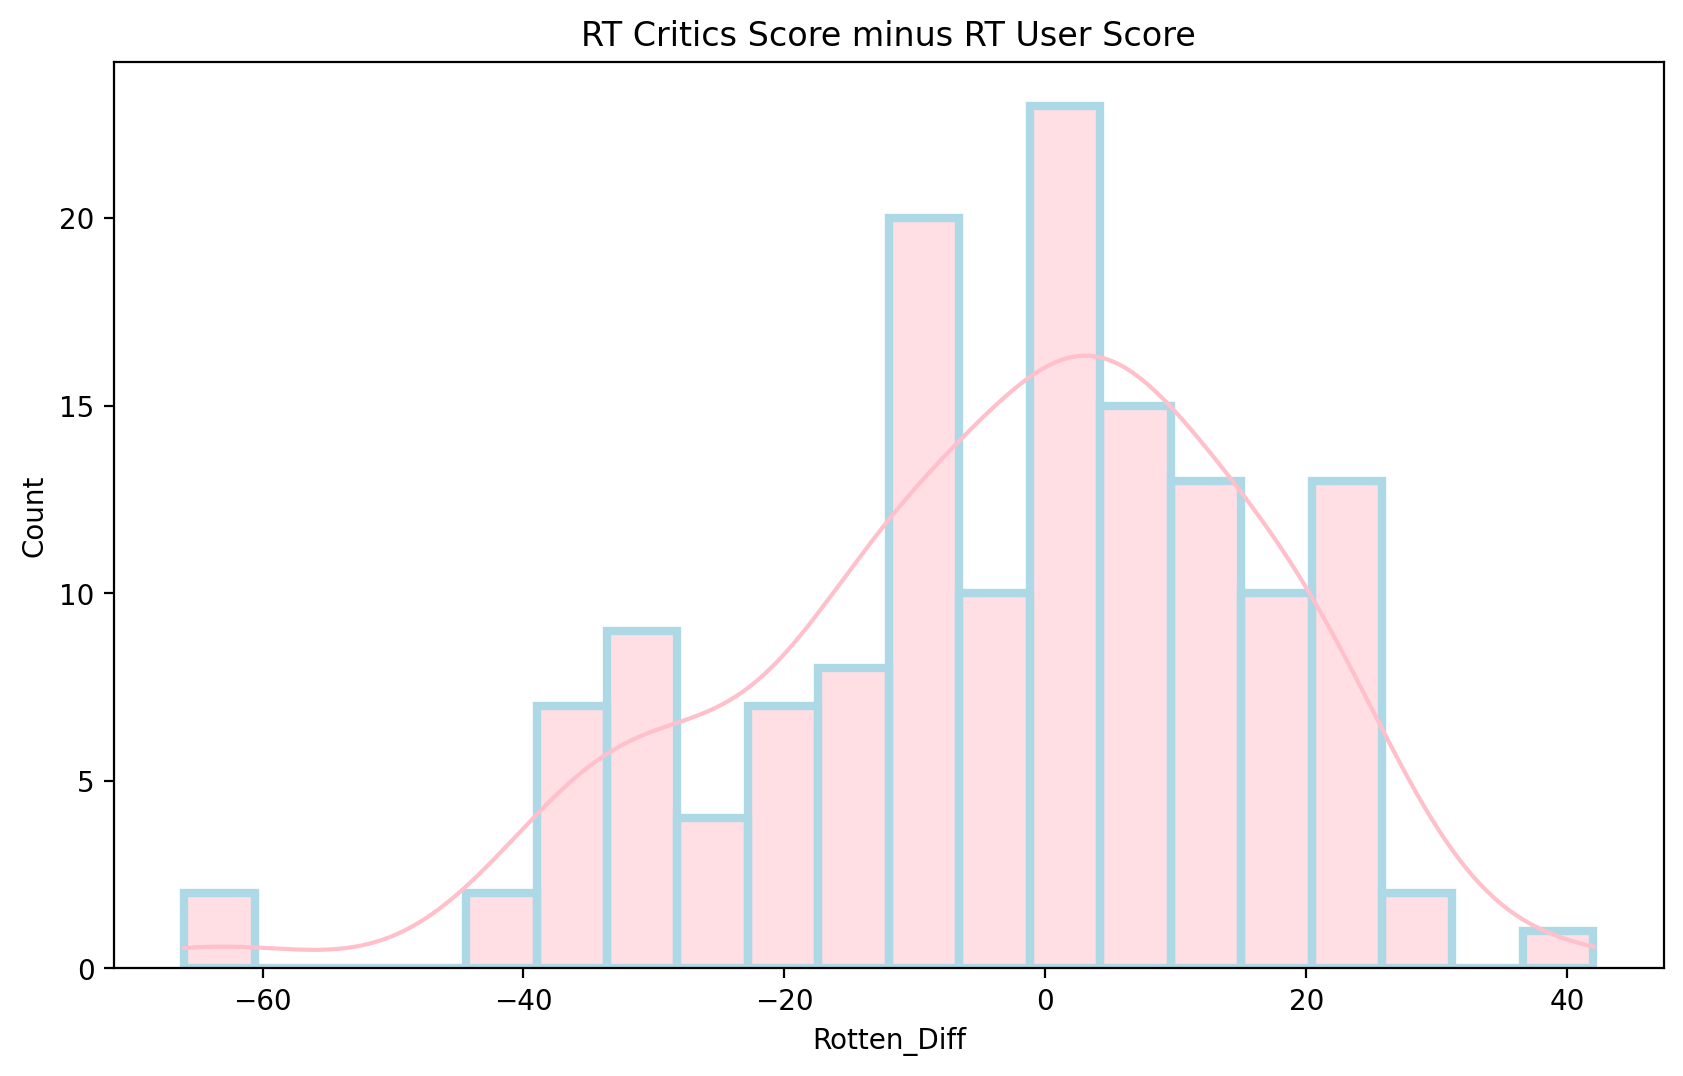

In [194]:
# график распределения разницы

plt.figure(figsize = (10, 6), dpi = 200)
sns.histplot(data = all_sites, x = 'Rotten_Diff', bins = 20, color = 'pink',
            linewidth = 3, edgecolor = 'lightblue', kde = True)

plt.title('RT Critics Score minus RT User Score')

### Задание 13

Далее нарисуйте график распределения абсолютных значений разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

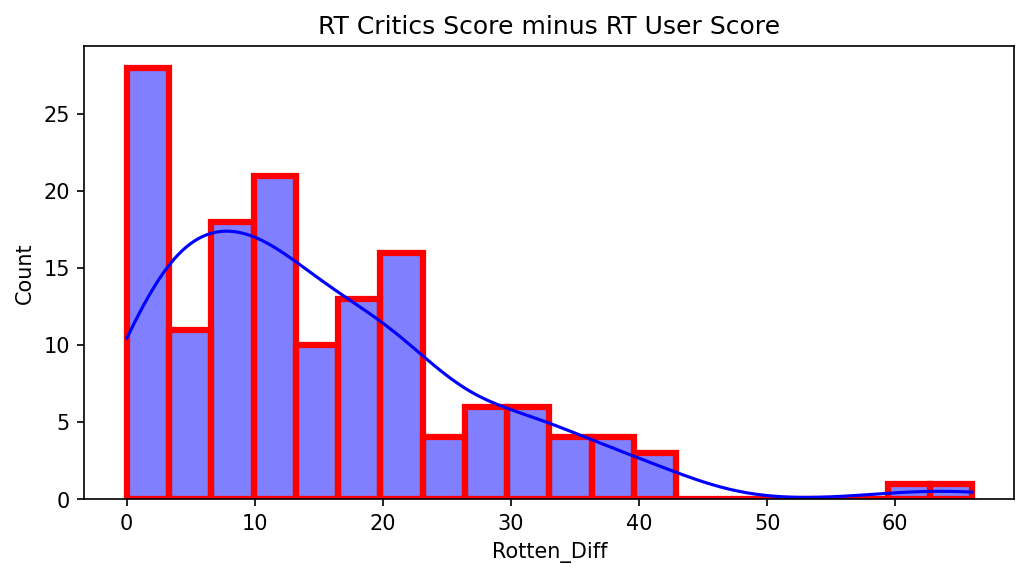

In [140]:
plt.figure(figsize = (8, 4), dpi = 150)
sns.histplot(data = all_sites, x = all_sites['Rotten_Diff'].apply(func), bins = 20, color = 'blue',
            linewidth = 3, edgecolor = 'red', kde = True)

plt.title('RT Critics Score minus RT User Score')

Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведите 5 фильмов с наибольшей по модулю отрицательной разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.

### Задание 14

Какие 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков

In [141]:
# первые 5 самых отрицательных
# пользователи оценили намого выше, чем критики 

cols = ['FILM', 'Rotten_Diff']
all_sites.sort_values('Rotten_Diff')[cols][:5]

# ИЛИ - all_sites.nsmallest(5, 'Rotten_Diff')[cols]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


### Задание 15

Далее наоборот - отобразите 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.

In [196]:
cols = ['FILM', 'Rotten_Diff']
all_sites.sort_values('Rotten_Diff', ascending=False)[cols][:5]

# или через nlargest

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

### Задание 16

Нарисуйте график scatterplot для сравнения рейтингов Metacritic и Metacritic User.

(0.0, 10.0)

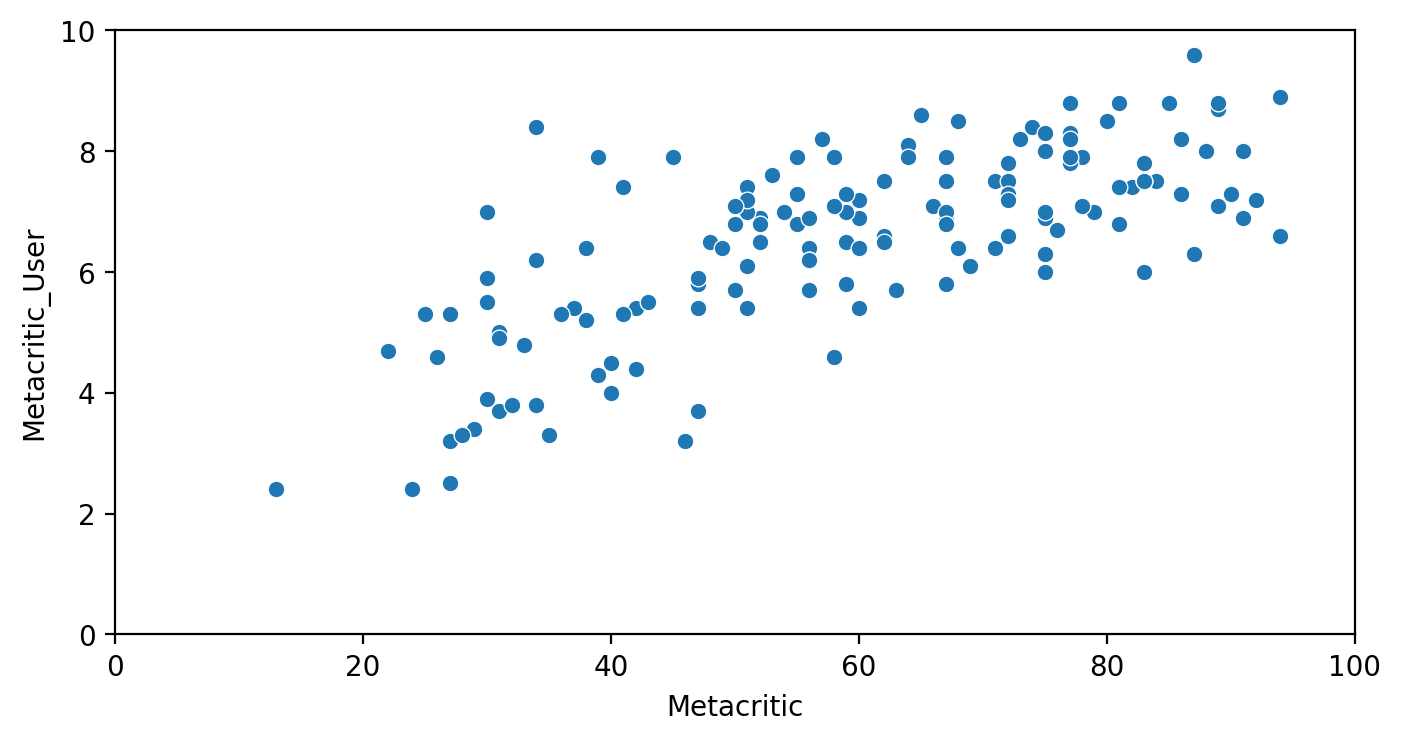

In [199]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')

plt.xlim(0, 100)
plt.ylim(0, 10)

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

### Задание 17

Нарисуйте график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

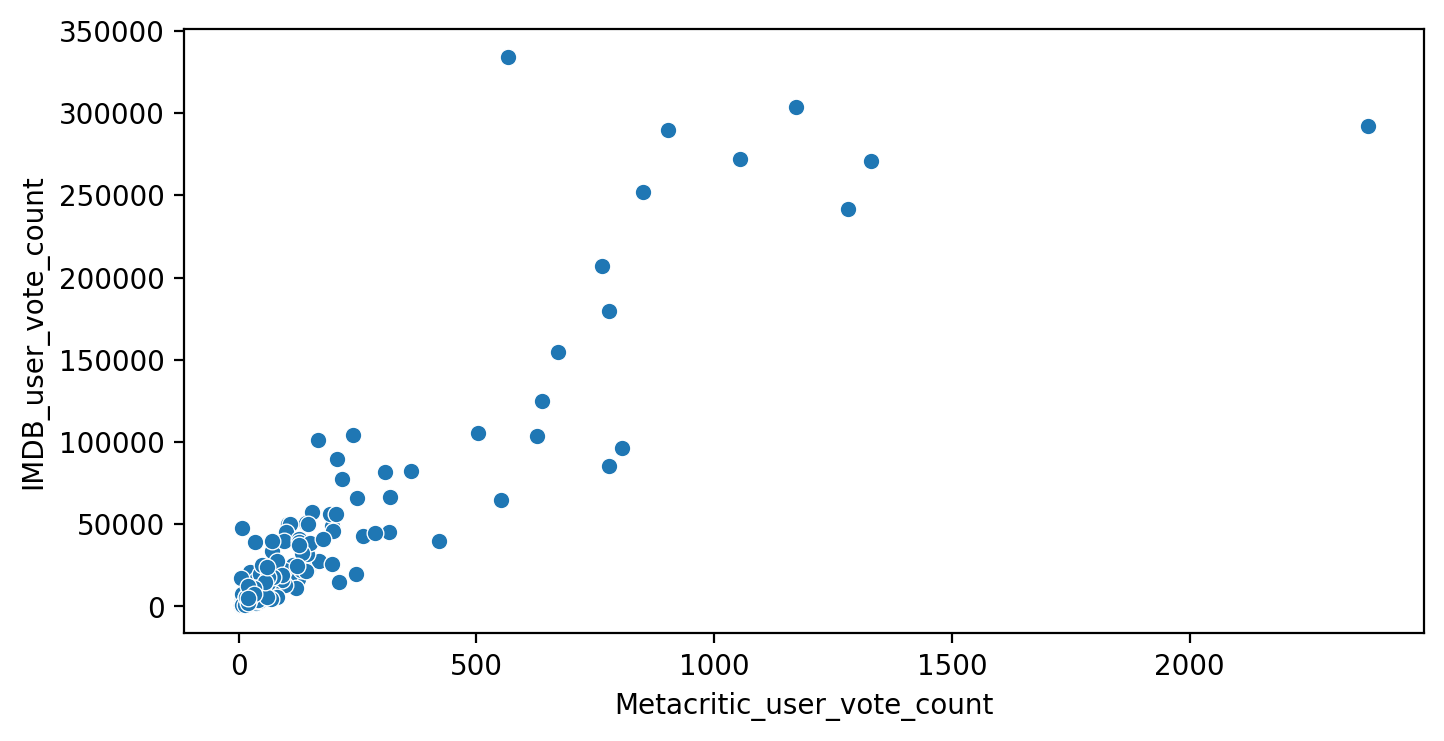

In [144]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', 
                y = 'IMDB_user_vote_count')

### Задание 18 

Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. Что это за фильм?

In [145]:
max_value = all_sites['IMDB_user_vote_count'].max()
all_sites[all_sites['IMDB_user_vote_count'] == max_value]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [146]:
# или через Series 

all_sites.iloc[all_sites['IMDB_user_vote_count'].idxmax()]

# сначала нашли индекс максимума, а потом уже фильм по этому индексу 

FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
Rotten_Diff                                          -2
Name: 14, dtype: object

### Задание 19 

Какой фильм получил наибольшее количество голосов на Metacritic?

In [147]:
max_value = all_sites['Metacritic_user_vote_count'].max()
all_sites[all_sites['Metacritic_user_vote_count'] == max_value]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [148]:
# по сравнению с первоначальным видом у этого df появился новый столбец

all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

### Задание 20 

Объедините таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах. Поэтому сделайте объединение "inner merge" двух наборов данных, сопоставляя строки по колонке FILM.

In [149]:
# объединение 2 датафреймов 
# inner - строки, ктр есть сразу в двух датафреймах

new_df = pd.merge(fandango, all_sites, how = 'inner', on = 'FILM')

new_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [150]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [151]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Обратите внимание, что компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно нормализовать эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

### Задание 21 

Добавьте дополнительные колонки в new_df, и запишите в них нормализованные значения рейтингов от 0 до 5.

In [152]:
new_df['RT_Norm'] = np.round(new_df['RottenTomatoes'] / 20, 1)
new_df['RTU_Norm'] = np.round(new_df['RottenTomatoes_User'] / 20, 1)

new_df['Meta_Norm'] = np.round(new_df['Metacritic'] / 20, 1)
new_df['Meta_U_Norm'] = np.round(new_df['Metacritic_User'] / 2, 1)

new_df['IMDB_Norm'] = np.round(new_df['IMDB'] / 2, 1)

new_df.head()

# чтобы посмотреть, какие колонки меняются до 100, а какие до 10
# мж сделать следующее - new_df.describe().transpose()['max'] !! 

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


### Задание 22

Далее создайте DataFrame с названием norm_scores, в котором оставьте только нормализованные рейтинги. Также оставьте колонки STARS и RATING из исходной таблицы fandango.

In [153]:
# оставить только нормализованные рейтинги + рейтинги fandango

cols = ['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm']

norm_scores = new_df[cols]

norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?

### Задание 23

Нарисуйте график, сравнивающий распределения нормализованных рейтингов от всех компаний. Это можно сделать разными способами, но попробуйте использовать Seaborn KDEplot (посмотрите документацию).

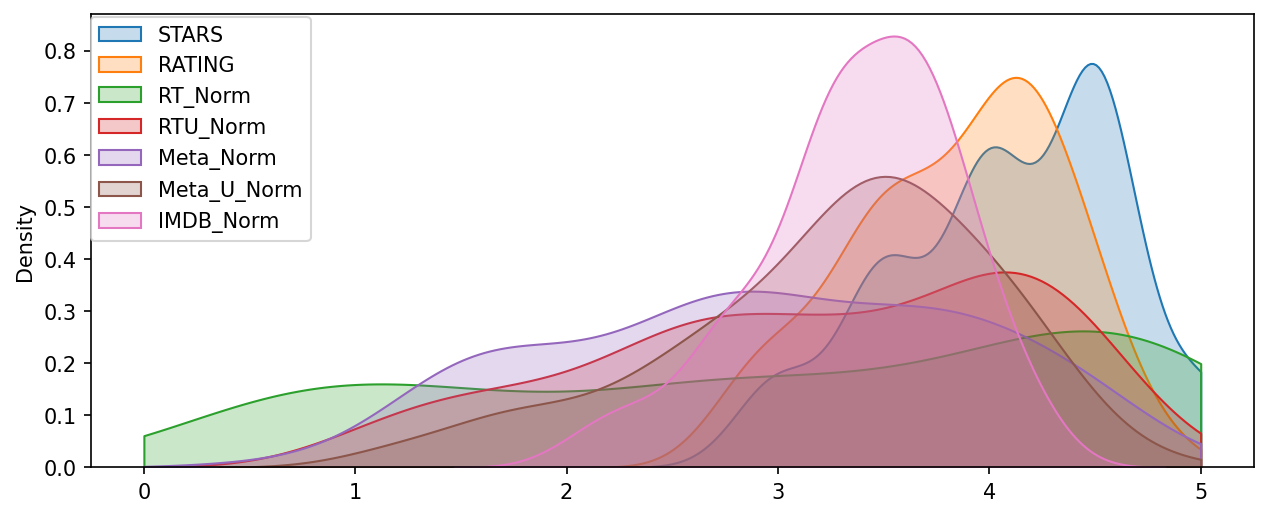

In [157]:
plt.figure(figsize = (10, 4), dpi = 150)

sns.kdeplot(data = norm_scores, x = 'STARS', clip = [0,5], fill = True,
           label = 'STARS')
sns.kdeplot(data = norm_scores, x = 'RATING', clip = [0,5], fill = True,
           label = 'RATING')
sns.kdeplot(data = norm_scores, x = 'RT_Norm', clip = [0,5], fill = True,
           label = 'RT_Norm')
sns.kdeplot(data = norm_scores, x = 'RTU_Norm', clip = [0,5], fill = True,
           label = 'RTU_Norm')
sns.kdeplot(data = norm_scores, x = 'Meta_Norm', clip = [0,5], fill = True,
           label = 'Meta_Norm')
sns.kdeplot(data = norm_scores, x = 'Meta_U_Norm', clip = [0,5], fill = True,
           label = 'Meta_U_Norm')
sns.kdeplot(data = norm_scores, x = 'IMDB_Norm', clip = [0,5], fill = True,
           label = 'IMDB_Norm')

# ИЛИ все 1 строкой - sns.kdeplot(data = norm_scores, clip = [0,5], fill = True)
# Но тогда не будет возможности сдвинуть легенду 

plt.xlabel('')
plt.legend(loc = (0, 0.5))

Мы сразу видим, что рейтинги Fandango очень сдвинуты вправо (синее распредедение). То есть являются завышенными.

Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.

### Задание 24

Нарисуйте график KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango.

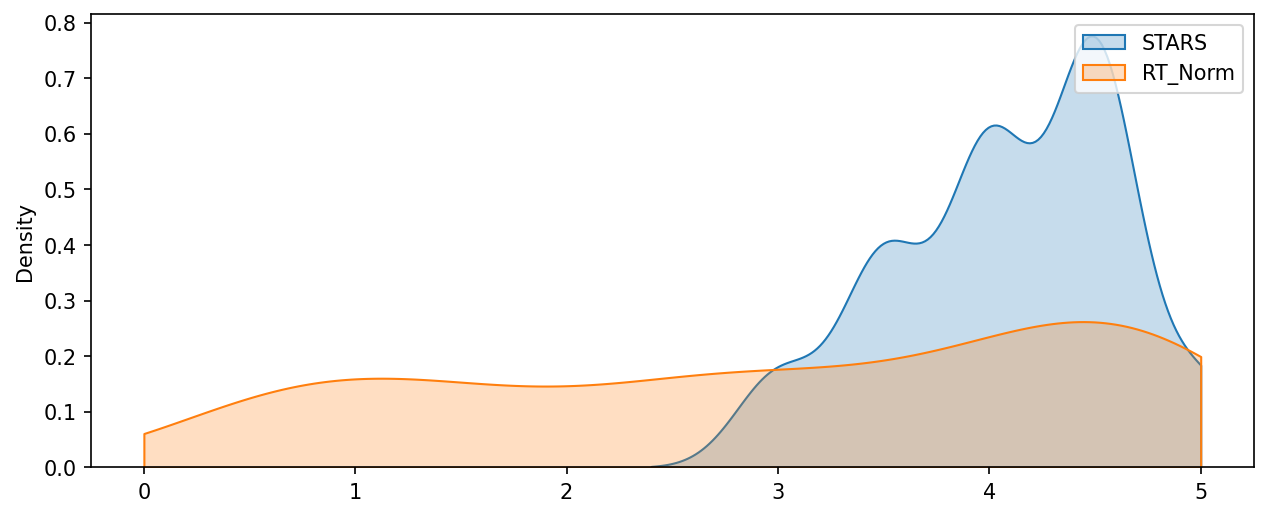

In [200]:
plt.figure(figsize = (10, 4), dpi = 150)

sns.kdeplot(data = norm_scores, x = 'STARS', clip = [0,5], fill = True,
           label = 'STARS')
sns.kdeplot(data = norm_scores, x = 'RT_Norm', clip = [0,5], fill = True,
           label = 'RT_Norm')

plt.xlabel('')
plt.legend()

### Задание 25 

Нарисуйте график histplot, сравнивающий все нормализованные рейтинги.

<AxesSubplot:ylabel='Count'>

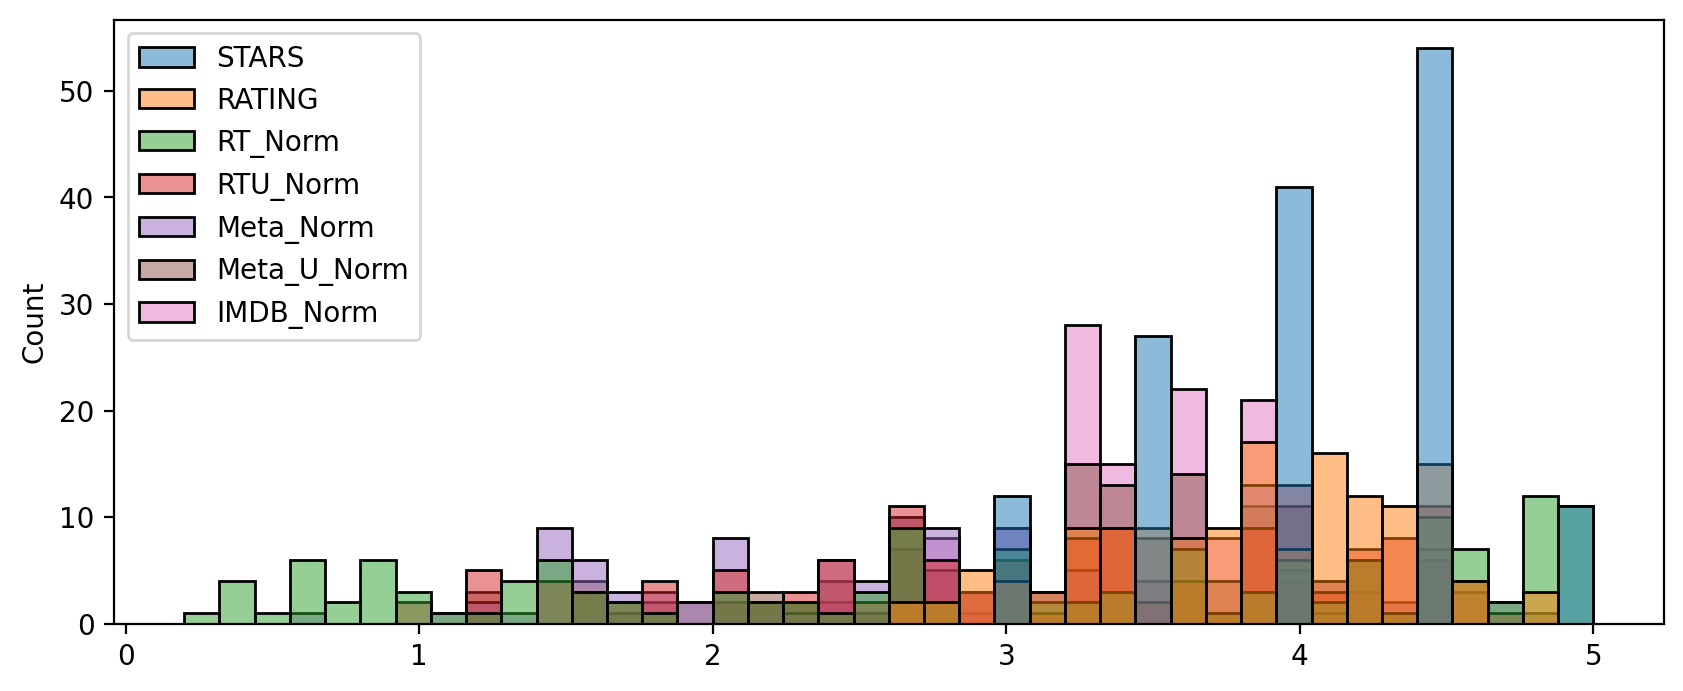

In [163]:
plt.figure(figsize = (10, 4), dpi = 200)
sns.histplot(data = norm_scores, bins = 40)

### Задание 26

Нарисуйте график clustermap для всех нормализованных рейтингов. Обратите внимание на отличия в рейтингах между разными компаниями. Фильмы с высокими рейтингами должны попадать в одни кластеры, а фильмы с низкими рейтингами в другие кластеры.

<Figure size 2000x800 with 0 Axes>

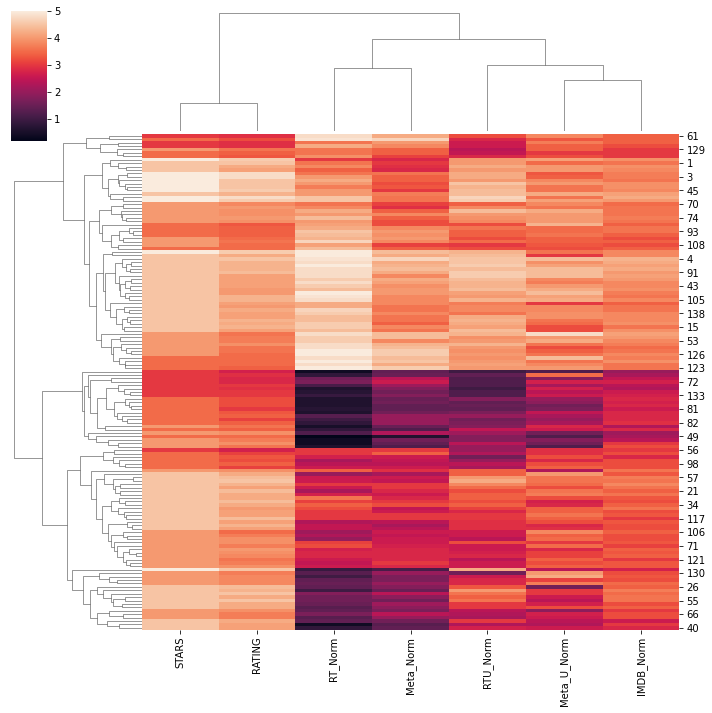

In [166]:
plt.figure(figsize = (10, 4), dpi = 200)
sns.clustermap(data = norm_scores)

### Задание 27

Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании? (Возможно Вам понадобится колонка FILM)

In [167]:
cols = ['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm', "FILM"]

df = new_df[cols]

df.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [170]:
tmp_df = df.sort_values('RT_Norm')[0:10]

tmp_df

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


### Задание 28

Визуализируйте распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.

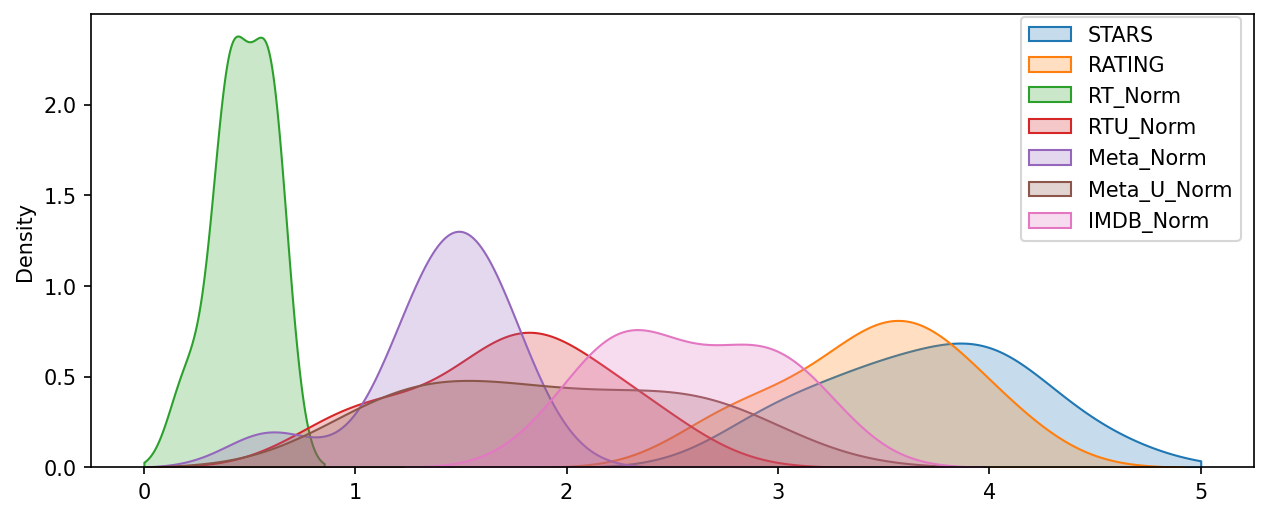

In [174]:
plt.figure(figsize = (10, 4), dpi = 150)

sns.kdeplot(data = tmp_df, x = 'STARS', clip = [0,5], fill = True,
           label = 'STARS')
sns.kdeplot(data = tmp_df, x = 'RATING', clip = [0,5], fill = True,
           label = 'RATING')
sns.kdeplot(data = tmp_df, x = 'RT_Norm', clip = [0,5], fill = True,
           label = 'RT_Norm')
sns.kdeplot(data = tmp_df, x = 'RTU_Norm', clip = [0,5], fill = True,
           label = 'RTU_Norm')
sns.kdeplot(data = tmp_df, x = 'Meta_Norm', clip = [0,5], fill = True,
           label = 'Meta_Norm')
sns.kdeplot(data = tmp_df, x = 'Meta_U_Norm', clip = [0,5], fill = True,
           label = 'Meta_U_Norm')
sns.kdeplot(data = tmp_df, x = 'IMDB_Norm', clip = [0,5], fill = True,
           label = 'IMDB_Norm')

plt.xlabel('')
plt.legend(loc = (0.8, 0.5))

ИТОГ: Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!